# Entendimiento de datos
En este notebook se abordan dos aspectos importantes para el entendimiento de un conjunto de datos, buscando responder a las necesidades de una empresa en términos de análisis de información:
* Exploración y perfilamiento de datos
    * Carga
    * Descripción básica
    * Visualización
    * Perfilamiento

* Calidad de datos e ideas de preparación
  * Completitud
  * Unicidad / Duplicidad
  * Validez / Estandarizacón


In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Este comando es requerido para que las visualizaciones se muestren en este notebook
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

# Exploración y perfilamiento de datos

## 1. Carga de los datos

In [3]:
# Cambiar por ruta correcta
ruta_archivo = r'202320_Laboratorio 2 - Regresión_data_laptop_data_train.csv'



# Lectura de datos en formato CSV
# Los datos son almacenados en memoria usando una estructura de datos de Pandas conocida como dataframe
df_tracks = pd.read_csv(ruta_archivo, sep=',')

In [4]:
# Dimensiones del dataframe
df_tracks.shape

(1216, 14)

In [5]:
# Impresión de algunos registros del dataframe
df_tracks.sample(5) # Muestra aleatoria
#df_tracks.head(5) # Primeras Filas
#df_tracks.tail(5) # Ultimas Filas

id Company  TypeName  Ram  Weight      Price  TouchScreen  Ips  \
138    493    Acer  Notebook    8    2.20  10.336864            0    0   
21     463  Lenovo  Notebook    8    1.50  10.658922            0    1   
765    511    Acer  Notebook    4    2.20  10.435465            0    0   
1124   588  Lenovo  Notebook   12    2.20  10.387379            1    0   
673   1246    Asus    Gaming   16    2.34  11.727036            0    1   

             Ppi      Cpu_brand     HDD  SSD Gpu_brand       Os  
138   100.454670  AMD Processor  1000.0    0       AMD  Windows  
21    157.350512  Intel Core i7     0.0  512       AMD   Others  
765   141.211998  Intel Core i7   500.0    0    Nvidia  Windows  
1124  100.454670  Intel Core i7  1000.0    0     Intel  Windows  
673   141.211998  Intel Core i7  1000.0  256    Nvidia  Windows

## 2. Descripción de los datos

In [6]:
# Impresión del tipo de dato asociado a cada columna
df_tracks.dtypes

id               int64
Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
Cpu_brand       object
HDD            float64
SSD              int64
Gpu_brand       object
Os              object
dtype: object

#### 2.1 Datos numéricos

In [7]:
# Se calculan las estadísticas principales de las columnas numéricas
df_tracks.describe()

id          Ram       Weight        Price  TouchScreen  \
count  1216.000000  1216.000000  1193.000000  1201.000000  1216.000000   
mean    637.925164     8.458882     2.401572    13.114402     0.145559   
std     367.482876     5.094332     4.844791    28.659102     0.352809   
min       0.000000     2.000000     0.690000     9.134616     0.000000   
25%     319.750000     4.000000     1.500000    10.403650     0.000000   
50%     638.500000     8.000000     2.040000    10.882316     0.000000   
75%     954.250000     8.000000     2.320000    11.288115     0.000000   
max    1272.000000    64.000000    97.729949   499.766079     1.000000   

               Ips          Ppi           HDD          SSD  
count  1216.000000  1204.000000   1200.000000  1216.000000  
mean      0.285362   183.830716    441.218800   187.529605  
std       0.451772   449.708876    927.052855   186.902926  
min       0.000000    90.583402      0.000000     0.000000  
25%       0.000000   127.335675      0.000000     0.000000  
50%       0.000000   141.211998      0.000000   256.000000  
75%       1.000000   157.350512   1000.000000   256.000000  
max       1.000000  7328.468865  24127.543112  1024.000000

## 3. Visualización de datos


In [8]:
df_top = df_tracks[['Ram', 'Weight', 'Price', 'TouchScreen']].groupby('Ram').sum().sort_values('Ram', ascending = False).head(20)

In [9]:
df_top

Weight        Price  TouchScreen
Ram                                       
64      3.580000    12.263341            0
32     62.670000   193.103091            3
24      6.570000    23.092750            1
16    503.198955  2868.775106           42
12     55.800000   275.690134            7
8    1323.456258  8130.836353           94
6      73.100000   342.876893            3
4     817.869735  3780.659352           26
2      18.830000   123.100006            1

In [10]:
df_plot = df_tracks.loc[df_tracks.Ram.isin(df_top.index)]

In [11]:
df_plot.shape

(1216, 14)

### 1.1 Diagrama de puntos (numérico vs. numérico)

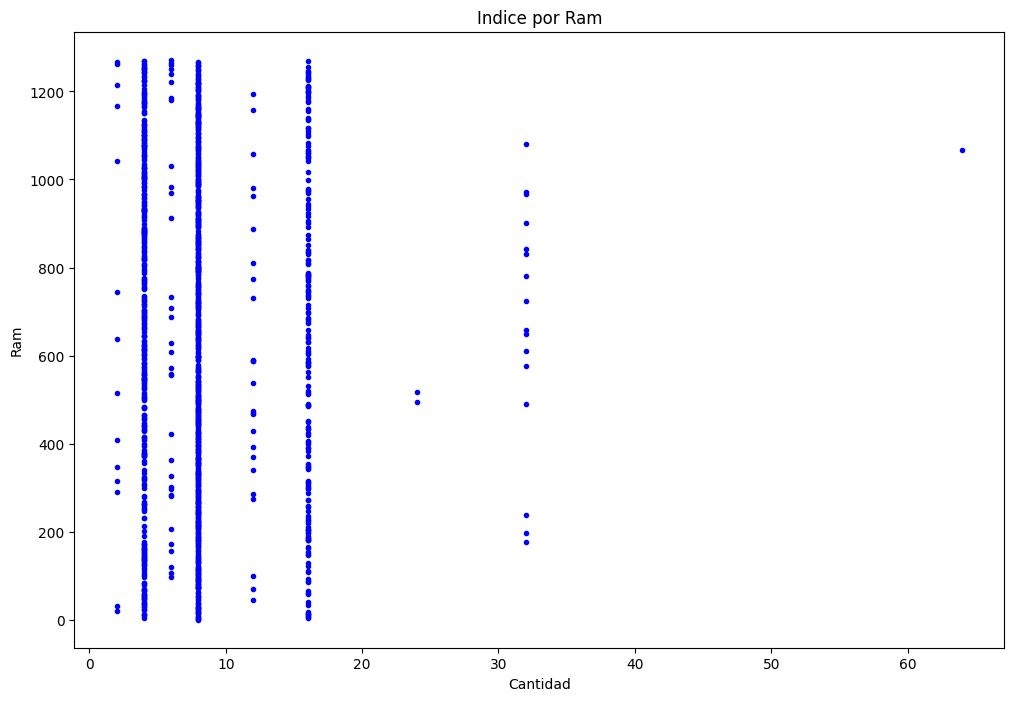

In [12]:
# Visualización de un scatter plot usando matplotlib
plt.figure(figsize = (12, 8))
plt.plot(df_plot['Ram'], df_plot['id'], '.', color = 'blue')
plt.title('Indice por Ram')
plt.xlabel('Cantidad')  
plt.ylabel('Ram')  
plt.show()

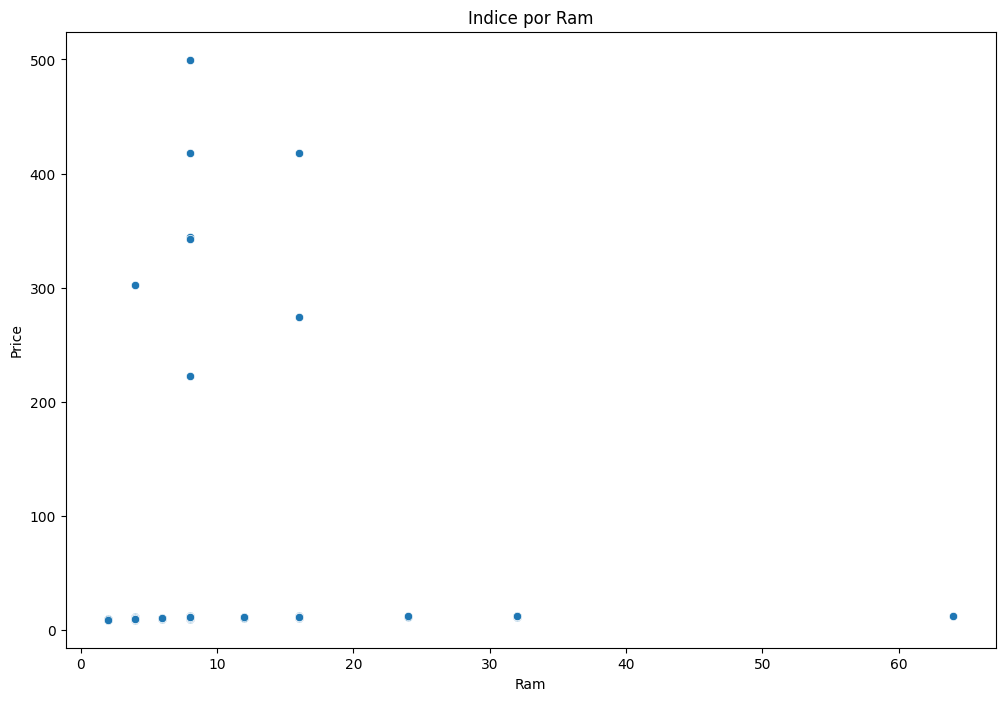

In [13]:
# Visualización de un scatter plot usando seaborn
fig = plt.figure(figsize = (12, 8))
sns.scatterplot(data = df_plot, x = 'Ram', y = 'Price')
plt.title('Indice por Ram')
plt.xlabel('Ram')  
plt.ylabel('Price')  
plt.show()

### 1.3 Histograma (numérico)

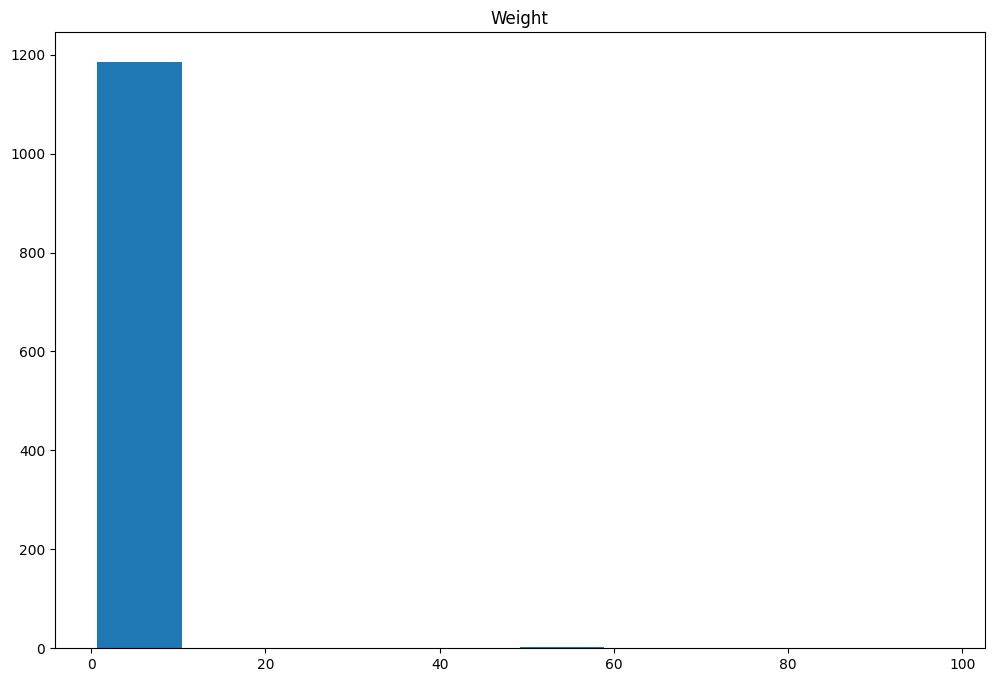

In [14]:
plt.figure(figsize = (12, 8))
plt.hist(df_plot['Weight'], bins = 10)
plt.title('Weight')  
plt.show()

C:\Users\JBErd\AppData\Local\Temp\ipykernel_22720\81988264.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_plot['Ram'], bins = 10)


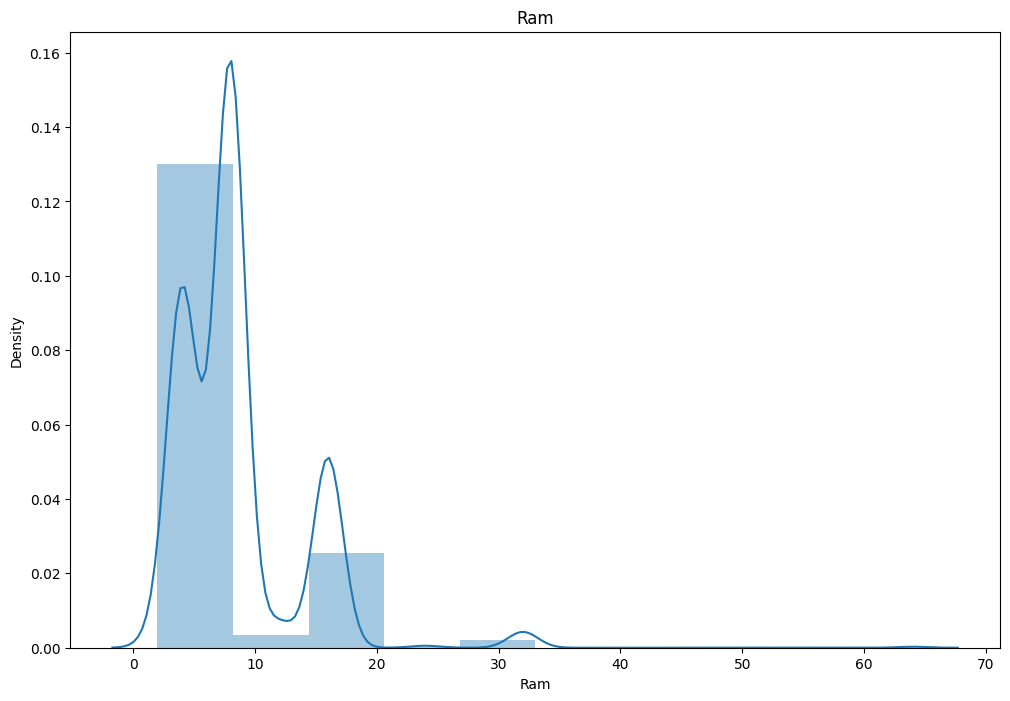

In [15]:
plt.figure(figsize = (12, 8))
plt.tight_layout()
sns.distplot(df_plot['Ram'], bins = 10)
plt.title('Ram')  
plt.show()

## 2. Perfilamiento

Para realizar un perfilamiento general de los datos se puede usar la librería Pandas Profiling.

Esta librería, a partir de los tipos de datos identificados por Pandas, calcula un conjunto de estadísticas y construye algunas visualizaciones estándares para datos de tipo numérico, categórico, temporales, entre otros.

La documentación oficial de Pandas Profiling se puede encontrar aquí: [https://github.com/ydataai/pandas-profiling](https://github.com/pandas-profiling/pandas-profiling).

In [16]:
!pip install pandas-profiling --upgrade

In [17]:
import pandas_profiling

C:\Users\JBErd\AppData\Local\Temp\ipykernel_22720\1591302161.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [18]:
profile = pandas_profiling.ProfileReport(df_tracks)

In [19]:
# Esta parte del código puede fallar por problemas con la versión de pandas_profiling
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
# Puede revisar la documentación de la librería para averiguar como embeber el reporte generado en el notebook
# En este caso se decide exportar el reporte a un archivo HTML
profile.to_file('spotify_db_profile.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Importante:** En general es buena idea utilizar este tipo de herramientas que automatizan algunos pasos en el proceso de exploración de datos, sin embargo, bajo ningún escenario en ejercicio de exploración se puede limitar solo al uso de esta herramienta. El análisis de los resultados obtenidos es lo más importante.

## Calidad y preparación de datos

En este punto vamos a analizar diferentes dimensiones de calidad, de acuerdo con los datos y el problema a abordar. Recuerda que el objetivo es entender cómo se encuentran los datos para determinar el esfuerzo requerido para su preparación posterior.

## 1. Completitud
Buscar registros con valores faltantes y decidir, desde el contexto del  negocio, que se puede hacer con ellos. Por lo general podemos:
* Eliminar
* Reemplazar

In [21]:
# Se calcula el porcentaje de valores vacios de cada columna
(df_tracks.isnull().sum() / df_tracks.shape[0]).sort_values(ascending = False)

Weight         0.018914
HDD            0.013158
Price          0.012336
Ppi            0.009868
id             0.000000
Company        0.000000
TypeName       0.000000
Ram            0.000000
TouchScreen    0.000000
Ips            0.000000
Cpu_brand      0.000000
SSD            0.000000
Gpu_brand      0.000000
Os             0.000000
dtype: float64

En este punto es importante determinar opciones a plantear para la transformación de los datos. Algunas estrategias para solventar este tipo de problemas de calidad son:
- Para columnas numéricas: Imputar por la media o la mediana. También se puede imputar por estas mismas estadísticas pero calculadas a partir de una columna categórica.
- Para columnas categórcas: Imputar por la moda. También se puede imputar por esta misma estadística pero calculada a partir de otra columna categórica.

## 2. Unicidad / Duplicidad
Identificar las filas que tienen valores idénticos, ya sea en todas sus columnas o en aquellas que deben tener valores únicos, como lo puede ser el identificador o alguna combinación única de columnas: nombre de canción, artista y año.

In [22]:
# En este caso se revisan duplicados solo por #
# Se imprimen algunos de los registros duplicados para propósitos de comparación

df_tracks.loc[df_tracks.duplicated(subset = 'id', keep = False)].sort_values(by = 'id').head(6)

id Company            TypeName  Ram  Weight      Price  TouchScreen  \
317   12   Apple           Ultrabook   16    1.83  11.775302            0   
363   12   Apple           Ultrabook   16    1.83  11.775302            0   
775   12   Apple           Ultrabook   16    1.83  11.775302            0   
658  182  Lenovo  2 in 1 Convertible   16    1.40  11.497961            1   
798  182  Lenovo  2 in 1 Convertible   16    1.40  11.497961            1   
128  645  Lenovo            Notebook    4    1.43   9.588689            0   

     Ips         Ppi              Cpu_brand  HDD  SSD Gpu_brand       Os  
317    1  220.534624          Intel Core i7  0.0  256       AMD      Mac  
363    1  220.534624          Intel Core i7  0.0  256       AMD      Mac  
775    1  220.534624          Intel Core i7  0.0  256       AMD      Mac  
658    1  316.965060          Intel Core i7  0.0  512     Intel  Windows  
798    1  316.965060          Intel Core i7  0.0  512     Intel  Windows  
128    0  111.935204  Other Intel Processor  0.0    0     Intel  Windows

In [23]:
# Duplicados
df_tracks.duplicated(subset = 'id', keep = False).sum()

10

In [24]:
# Pandas para eliminar registros duplicados
df_tracks.drop_duplicates(subset = 'id', keep = 'first', inplace = True)

In [25]:
df_tracks.duplicated(subset = 'id', keep = False).sum()

0

In [26]:
duplicated_rows = df_tracks.loc[df_tracks.duplicated(subset='id', keep=False)].shape[0]
duplicated_rows

0

## 3. Consistencia
Este proceso se basa en tener conherencia entre los diferentes valores de la columna. Es decir, que:
No se tengan difrentes cadenas o números para la misma categoría en una columna con valores categóricos.


## 3.1 Categóricos


In [27]:
# Revisamos los valores de la unica variable categorica: titleType
df_tracks['Os'].value_counts()

Os
Windows    1045
Others      144
Mac          21
Name: count, dtype: int64

In [28]:
#Minuculas para normalizar las posibles diferencias por mayus 
df_tracks['Os'] = df_tracks['Os'].str.strip().str.lower()
df_tracks['Os'].value_counts()

Os
windows    1045
others      144
mac          21
Name: count, dtype: int64

In [29]:
df_tracks['Company'] = df_tracks['Company'].str.strip().str.lower()
df_tracks['TypeName'] = df_tracks['TypeName'].str.strip().str.lower()
df_tracks['Cpu_brand'] = df_tracks['Cpu_brand'].str.strip().str.lower()
df_tracks['Gpu_brand'] = df_tracks['Gpu_brand'].str.strip().str.lower()
df_tracks['Os'] = df_tracks['Os'].str.strip().str.lower()

## 4 . Validez / Estandarización
Validez es la correctitud de un valor a nivel principalmente de formato y valor de una columna de acuerdo al contexto. Ejemplos de esta dimensión son:
* Que los números dentro de una columna categórica pertenezcan a un rango establecido.
* Que las fechas de una columna se encuentren dentro de un rango de fechas establecido.

Un caso especial de la validez es la estandarización de datos. Esta hace referencia a que la representación de de los valores de las columnas cumpla un cierto estandar a través de la organización, garantizando que se pueden juntar o comparar columnas entre diferentes tablas. De nuevo, estos estandares por lo general vienen preestablecidos y el proceso de estandarización debe simplemente acoplarse a ellos.

## 4.1 Revisión a nivel de datos **numéricos**

In [30]:
# Resumen
number_cols = df_tracks.dtypes[(df_tracks.dtypes == np.int64) | (df_tracks.dtypes == np.float64)].index
number_cols = df_tracks.select_dtypes(include = ['int', 'float']).columns
number_cols

Index(['id', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD',
       'SSD'],
      dtype='object')

In [31]:
df_tracks[number_cols].describe()

id          Ram       Weight        Price  TouchScreen  \
count  1210.000000  1210.000000  1187.000000  1197.000000  1210.000000   
mean    638.606612     8.451240     2.404368    13.120935     0.145455   
std     366.845797     5.088272     4.856803    28.706715     0.352704   
min       0.000000     2.000000     0.690000     9.134616     0.000000   
25%     321.250000     4.000000     1.500000    10.403650     0.000000   
50%     638.500000     8.000000     2.040000    10.882316     0.000000   
75%     953.750000     8.000000     2.320000    11.288115     0.000000   
max    1272.000000    64.000000    97.729949   499.766079     1.000000   

               Ips          Ppi           HDD          SSD  
count  1210.000000  1198.000000   1194.000000  1210.000000  
mean      0.282645   183.789473    441.760938   187.613223  
std       0.450471   450.807481    928.748019   186.879532  
min       0.000000    90.583402      0.000000     0.000000  
25%       0.000000   127.335675      0.000000     0.000000  
50%       0.000000   141.211998      0.000000   256.000000  
75%       1.000000   157.350512   1000.000000   256.000000  
max       1.000000  7328.468865  24127.543112  1024.000000

Podemos ver que "isAdult:" realmente no esta haciando nada y se podria elminiar 

y que calificacion promedio tiene calificaciones no permitidas deacuerdo al diccionario 

In [32]:
df_tracks = df_tracks.loc[df_tracks['Ram'] <= 10]

In [33]:
df_tracks[number_cols].describe()

id         Ram      Weight       Price  TouchScreen  \
count   977.000000  977.000000  956.000000  965.000000   977.000000   
mean    638.175026    6.425793    2.329734   12.816460     0.126919   
std     367.833922    1.964561    5.215152   27.935954     0.333053   
min       0.000000    2.000000    0.690000    9.134616     0.000000   
25%     322.000000    4.000000    1.500000   10.283659     0.000000   
50%     638.000000    8.000000    2.000000   10.731330     0.000000   
75%     954.000000    8.000000    2.200000   11.069796     0.000000   
max    1272.000000    8.000000   97.729949  499.766079     1.000000   

              Ips          Ppi           HDD          SSD  
count  977.000000   967.000000    962.000000   977.000000  
mean     0.251791   181.112142    411.083742   145.183214  
std      0.434264   454.780434    990.849694   145.619733  
min      0.000000    90.583402      0.000000     0.000000  
25%      0.000000   111.935204      0.000000     0.000000  
50%      0.000000   141.211998      0.000000   128.000000  
75%      1.000000   157.350512   1000.000000   256.000000  
max      1.000000  7328.468865  24127.543112  1024.000000

In [34]:
print(df_tracks.values[1])

[712 'dell' 'notebook' 8 1.98 10.56311104105693 0 0 141.21199808219862
 'intel core i5' 1000.0 0 'intel' 'others']


## 5 Modelo de regresión lineal

### 5.1 Particionamiento del conjunto de datos en entrenamiento y prueba

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [46]:
# Selecciona las características y el objetivo
features = ['Company', 'TypeName', 'Ram']
target = 'Price'

label_encoder = LabelEncoder()


In [53]:
for column in features:
       df_tracks.loc[:, column] = label_encoder.fit_transform(df_tracks[column])

X = df_tracks[features]
y = df_tracks[target]
y = y.fillna(0)



In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [55]:
y_test.fillna(0)
y_train.fillna(0)


956      9.493014
394     11.114428
1015    11.039465
168     11.056429
672     10.147032
          ...    
939     10.126164
94      11.039465
1122    10.808593
297     10.798847
49      10.466285
Name: Price, Length: 683, dtype: float64

In [56]:
y_train

956      9.493014
394     11.114428
1015    11.039465
168     11.056429
672     10.147032
          ...    
939     10.126164
94      11.039465
1122    10.808593
297     10.798847
49      10.466285
Name: Price, Length: 683, dtype: float64

In [57]:
X_train.shape, y_train.shape

((683, 3), (683,))

In [58]:
X_test.shape, y_test.shape

((294, 3), (294,))

In [59]:
regression = LinearRegression()


In [60]:
regression.fit(X_train, y_train)

LinearRegression()

In [61]:
# Realizar predicciones en el conjunto de prueba
y_pred = regression.predict(X_test)

# Calcular métricas de calidad
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 376.62447365979097
R-squared (R2) Score: -0.0020812736623379013


### Coeficientes de regresión

In [62]:
pd.DataFrame({"columns": features, "coef": regression.coef_})

columns      coef
0   Company  0.044067
1  TypeName  0.155075
2       Ram  1.646959

In [63]:
regression.intercept_

7.839821963409166

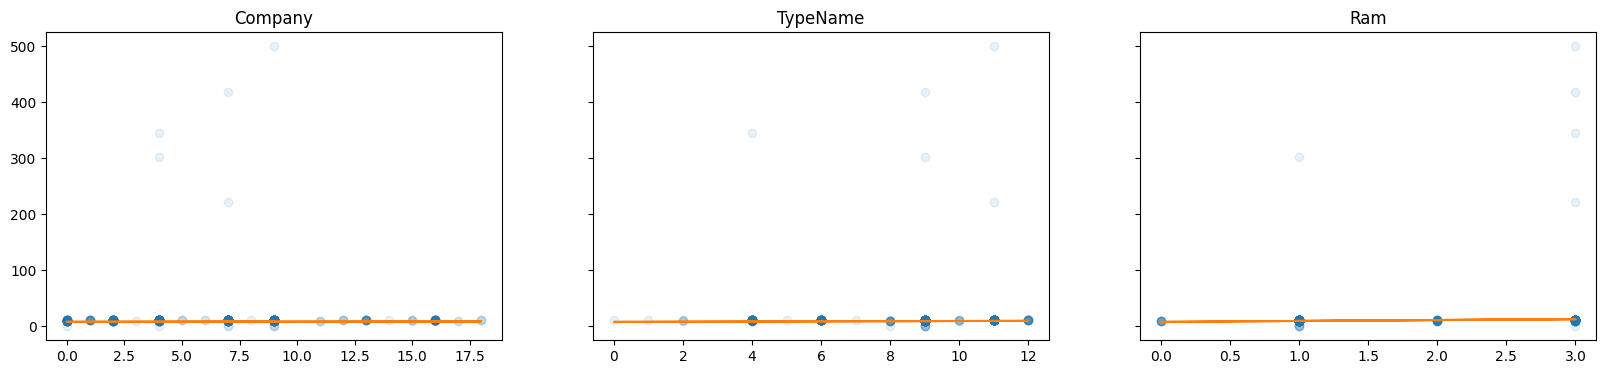

In [64]:
f, axs = plt.subplots(1, len(features), sharey=True, figsize=(20, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

## 5.2 Evalucación del modelo

**Mean Absolute Error (MAE)**

$$ MAE = {1 \over n}{\sum_{i=1}^n {|y_{i} - y_{i}'|} } $$

In [65]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

Train: 5.045020800122885
Test: 3.6951583963134556


**Root Mean Squeared Error (RMSE)**

$$ RMSE = {1 \over n}{\sum_{i=1}^n {(y_{i} - y_{i}')^2} } $$

In [66]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

Train: 30.645243406312755
Test: 19.406815134374597


**Análisis del error**

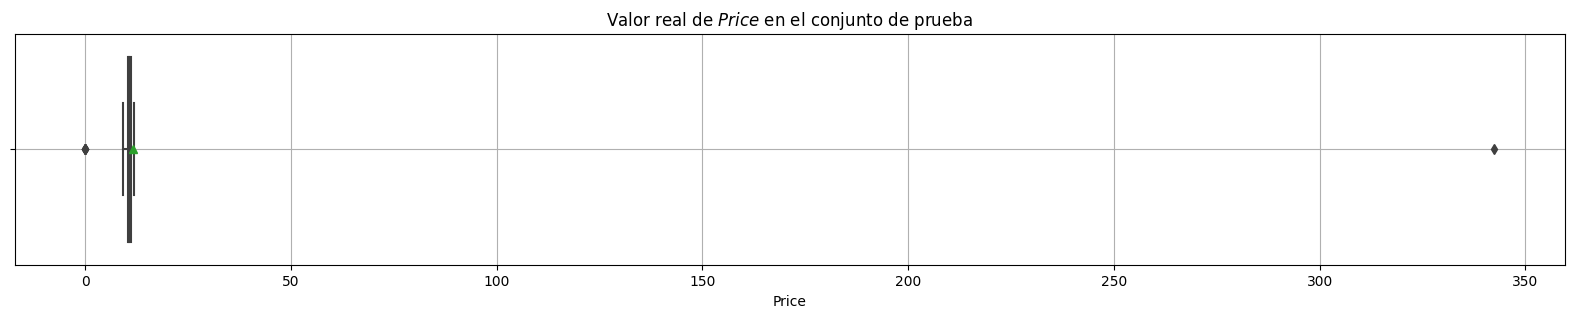

In [67]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_test, showmeans=True, orient="h")
plt.title("Valor real de $\t{Price}$ en el conjunto de prueba")
plt.grid()
plt.show()

In [68]:
y_test.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

count    294.000000
mean      11.630665
std       19.419706
min        0.000000
25%       10.287442
50%       10.700947
75%       11.064804
99%       11.714961
max      342.497973
Name: Price, dtype: float64

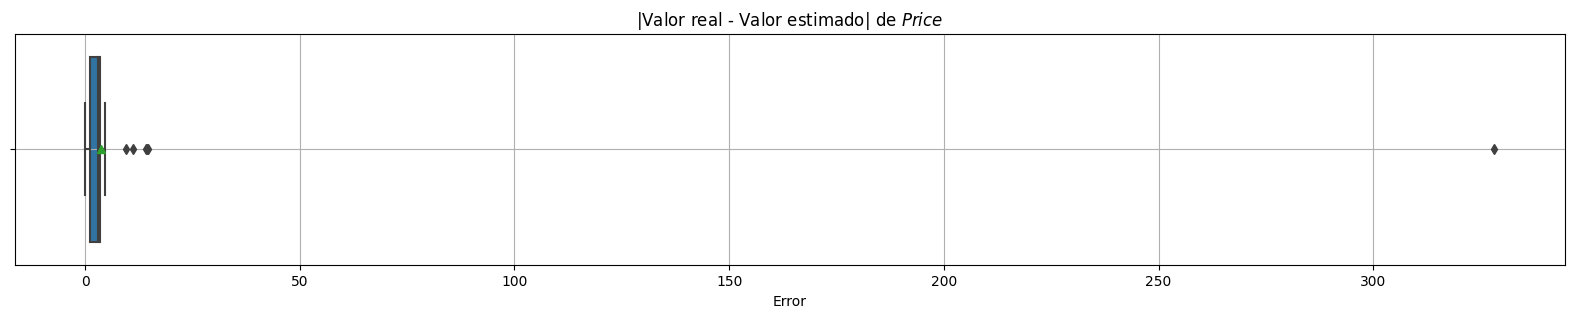

In [69]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs(y_test - regression.predict(X_test)), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{Price}$")
plt.xlabel("Error")
plt.grid()
plt.show()

In [70]:
abs(y_test-regression.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count    294.000000
mean       3.695158
std       19.084263
min        0.069790
25%        1.116075
50%        2.958179
75%        3.553306
95%        4.243011
99%       14.197971
max      328.213945
Name: Price, dtype: float64

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
import joblib

In [72]:
features2 = ['Company', 'TypeName', 'Ram', 'Os', 'Cpu_brand', 'Gpu_brand']
target = 'Price'

In [73]:
label_encoder = LabelEncoder()


In [79]:
X = df_tracks[features2]
y = df_tracks[target]
y = y.fillna(0)
# Ajusta el pipeline al conjunto de datos para entrenar el modelo
# Codifica las características categóricas
for column in X.select_dtypes(include=['object']):
    X[column] = label_encoder.fit_transform(X[column])




C:\Users\JBErd\AppData\Local\Temp\ipykernel_22720\3317708193.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\JBErd\AppData\Local\Temp\ipykernel_22720\3317708193.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = label_encoder.fit_transform(X[column])
C:\Users\JBErd\AppData\Local\Temp\ipykernel_22720\3317708193.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [80]:
# Define el pipeline con las transformaciones necesarias
pipeline = Pipeline([
    ('scaler', StandardScaler()),       # Estandarización de características numéricas
    ('regression', LinearRegression())  # Modelo de regresión lineal
])

In [81]:
# Ajusta el pipeline al conjunto de datos para entrenar el modelo

pipeline.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [82]:
pd.DataFrame({"columns": features2, "coef": pipeline["regression"].coef_})

columns      coef
0    Company  0.704494
1   TypeName -0.225424
2        Ram  1.519783
3         Os  0.050253
4  Cpu_brand  0.012426
5  Gpu_brand -0.128305

In [83]:
pipeline["regression"].intercept_

12.659041879263645

In [84]:
# Exporta el pipeline en formato .joblib
joblib.dump(pipeline, 'regression_pipeline.joblib')

['regression_pipeline.joblib']

In [86]:
loaded_pipeline = joblib.load('regression_pipeline.joblib')

In [87]:
loaded_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('regression', LinearRegression())])